In [87]:
from scipy.io.arff import loadarff
import pandas as pd
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.neural_network import MLPRegressor

# 1. load and partition data
data = loadarff('kin8nm.arff')
df = pd.DataFrame(data[0])
df.dropna(inplace=True)
df.reset_index(drop=True, inplace=True)

# apply linear regression with ridge regularization term of 0.1 and store the residues
X = df.drop('y', axis=1)
y = df['y']
X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, train_size=0.7, random_state=0)
ridge = Ridge(alpha=0.1, random_state=0)
ridge.fit(X_train, y_train)
y_pred = ridge.predict(X_test)
ridge_residues = abs(y_test - y_pred)
print('MAE:', mean_absolute_error(y_test, y_pred))
mlp_1 = MLPRegressor(hidden_layer_sizes=(10, 10), activation='tanh', max_iter=500, random_state=0, early_stopping=True).fit(X_train, y_train)
y_pred = mlp_1.predict(X_test)
mlp_residues = abs(y_test - y_pred)
print('MAE:', mean_absolute_error(y_test, y_pred))
mlp_2 = MLPRegressor(hidden_layer_sizes=(10, 10), activation='tanh', max_iter=500, random_state=0, early_stopping=False)
mlp_2.fit(X_train, y_train)
y_pred = mlp_2.predict(X_test)
mlp_2__residues = abs(y_test - y_pred)
print('MAE:', mean_absolute_error(y_test, y_pred))

MAE: 0.162829976437694
MAE: 0.06804140737968428
MAE: 0.0978071820387748


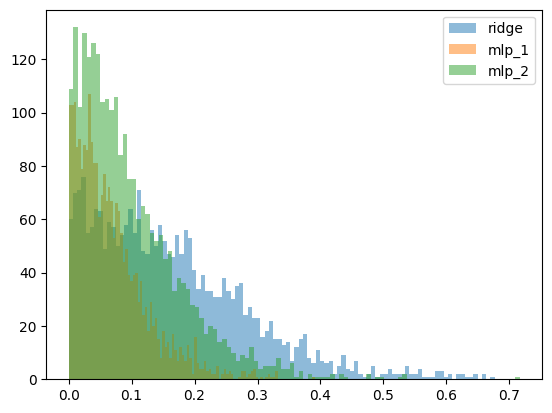

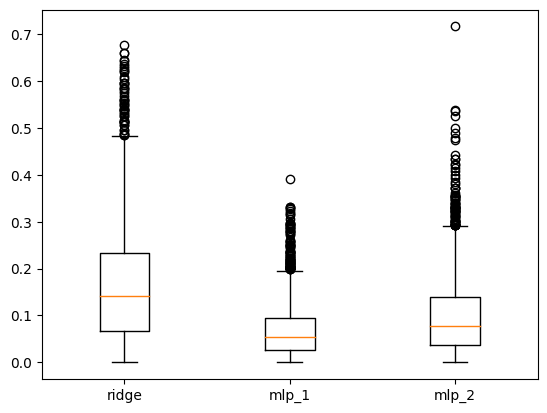

In [88]:
# plot ridge_residues, mlp_1_residues, mlp_2_residues in the same plot with different colors and legends as an histogram
import matplotlib.pyplot as plt
plt.hist(ridge_residues, bins = 100, alpha = 0.5, label='ridge')
plt.hist(mlp_residues, bins = 100, alpha = 0.5, label='mlp_1')
plt.hist(mlp_2__residues, bins = 100, alpha = 0.5, label='mlp_2')
plt.legend(loc='upper right')
plt.show()

# now do the same but boxplot
plt.boxplot([ridge_residues, mlp_residues, mlp_2__residues], labels=['ridge', 'mlp_1', 'mlp_2'])
plt.show()